# EE679 Assignment1
### Manas Vashistha
### 17D070064

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import signal
from scipy.io.wavfile import write
from IPython.display import Audio
pi = math.pi

### Question 1

In [2]:
f1 = 900
b1 = 200
fs = 16000

r = np.exp(-b1*pi/fs)
theta = 2*pi*f1/fs

b = [1]
a = [1, -2*r*np.cos(theta), r*r]
w, h = signal.freqz(b,a)
angles = np.angle(h)
plt.rcParams["figure.figsize"] = [16, 3]

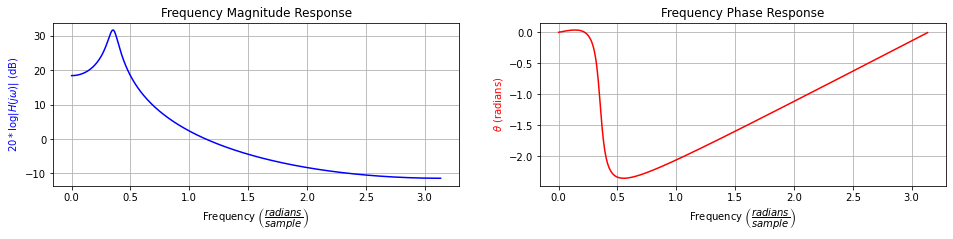

In [3]:
fig1, (plt1, plt2) = plt.subplots(1, 2)

plt1.plot(w, 20 * np.log10(abs(h)), 'b')
plt1.title.set_text('Frequency Magnitude Response')
plt1.set_ylabel('$20*\log{|H(j\omega)|}$ (dB)', color='b')
plt1.set_xlabel('Frequency $\left(\dfrac{radians}{sample}\\right)$')
plt1.grid()
plt1.axis('tight')

plt2.plot(w, angles, 'r')
plt2.title.set_text('Frequency Phase Response')
plt2.set_ylabel('$\\theta$ (radians)', color='r')
plt2.set_xlabel('Frequency $\left(\dfrac{radians}{sample}\\right)$')
plt2.grid()
plt2.axis('tight')

plt.show()

In [4]:
n_points = round(pi*100)
x = np.zeros(n_points)	
x[0] = 1	
y = np.zeros(n_points)
y[0] = x[0]
a1 = a[1].real
a2 = a[2].real
y[1] = x[1] - a1*y[0]		
for i in range(2, n_points):
	y[i] = x[i] - a[1].real*y[i-1] - a[2].real*y[i-2]
plt.rcParams["figure.figsize"] = [6.4, 4.8]

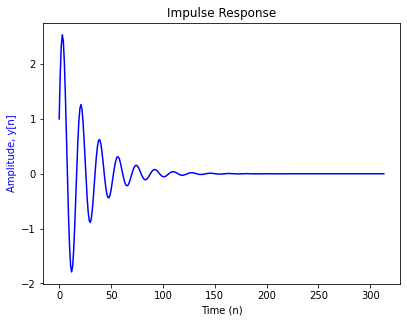

In [5]:
fig2, plt1 = plt.subplots(1, 1)
plt1.title.set_text('Impulse Response')
plt1.plot(np.arange(n_points), y, 'b')
plt1.set_ylabel('Amplitude, y[n]', color='b')
plt1.set_xlabel('Time (n)')
plt1.axis('tight')
plt.show()

### Question 2

- The function resonator(f0, f1, b1, fs, duration, op_name, input, x) simulates the excitation of a resonator with an impulse input or triangular wave input according to the value provided to input ('impulse' or 'triangular').

- The function plot_waveform(f0, f1, b1, fs, time, x, y) plots the input x and response y for given values of time.

In [6]:
def resonator(f0, f1, b1, fs, duration, op_name, input='impulse', x = None):

    r = np.exp(-b1*pi/fs)
    theta = 2*pi*f1/fs

    b = [1]
    a = [1, -2*r*np.cos(theta), r*r]

    time = np.arange(0, duration, 1/fs)
    y = np.zeros(len(time))
    if x is None:
        x = np.zeros(len(time))
        if input == 'impulse':
            for i in range(int(duration*f0)):
                x[i*int(np.floor(fs/f0))]=1
        elif input == 'triangular':

            values_x = [i/20 for i in range(21)] + []

            for i in range(int(duration*f0)):
                x[i*int(np.floor(fs/f0))]=values_x[0]
                x[i*int(np.floor(fs/f0))+1]=values_x[1]
                x[i*int(np.floor(fs/f0))+2]=values_x[2]
                x[i*int(np.floor(fs/f0))+3]=values_x[3]
                x[i*int(np.floor(fs/f0))+4]=values_x[4]

    y[0] = x[0]
    y[1] = x[1] - a1*y[0]	
    for i in range(2, len(time)):
        y[i] = x[i] - a[1].real*y[i-1] - a[2].real*y[i-2]

    # y_save = (y/np.abs(y).max()).astype(np.float32)
    y_save = np.int16(y/np.max(np.abs(y))*32767)
    write(op_name, fs, y_save)  
    return time, x, y          

def plot_waveform(f0, f1, b1, fs, duration, time, x, y):
    plt.rcParams["figure.figsize"] = [16, 4.8]

    fig, (plt1, plt2) = plt.subplots(1, 2)

    plt1.title.set_text('Input for $F_0$={}Hz, $F_1$={}Hz, $B_1$={}Hz, $F_s$={}kHz'.format(f0, f1, b1, fs/1000.0))
    plt1.plot(time, x, 'b')
    plt1.set_ylabel('x[n]', color='b')
    plt1.set_xlabel('Time (n)')
    plt1.axis('tight')

    plt2.title.set_text('Impulse Response for $F_0$={}Hz, $F_1$={}Hz, $B_1$={}Hz, $F_s$={}kHz'.format(f0, f1, b1, fs/1000.0))
    plt2.plot(time, y, 'r')
    plt2.set_ylabel('Amplitude, y[n]', color='r')
    plt2.set_xlabel('Time (n)')
    plt2.axis('tight')

    plt.show()

    fig2, (plt1, plt2) = plt.subplots(1, 2)

    plt1.title.set_text('Input (One cycle) for $F_0$={}Hz, $F_1$={}Hz, $B_1$={}Hz, $F_s$={}kHz'.format(f0, f1, b1, fs/1000.0))
    plt1.plot(time[:int(fs/f0)], x[:int(fs/f0)], 'b')
    plt1.set_ylabel('x[n]', color='b')
    plt1.set_xlabel('Time (n)')
    plt1.axis('tight')

    plt2.title.set_text('Impulse Response (One Cycle) for $F_0$={}Hz, $F_1$={}Hz, $B_1$={}Hz, $F_s$={}kHz'.format(f0, f1, b1, fs/1000.0))
    plt2.plot(time[:int(fs/f0)], y[:int(fs/f0)], 'r')
    plt2.set_ylabel('Amplitude, y[n]', color='r')
    plt2.set_xlabel('Time (n)')
    plt2.axis('tight')

    plt.show()

    plt.rcParams["figure.figsize"] = [6.4, 4.8]

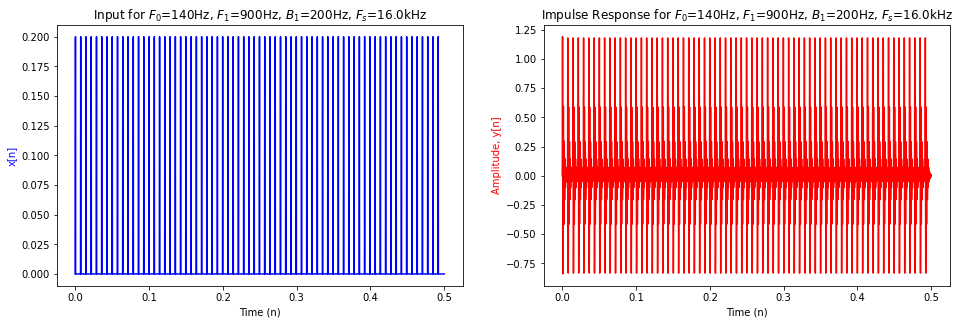

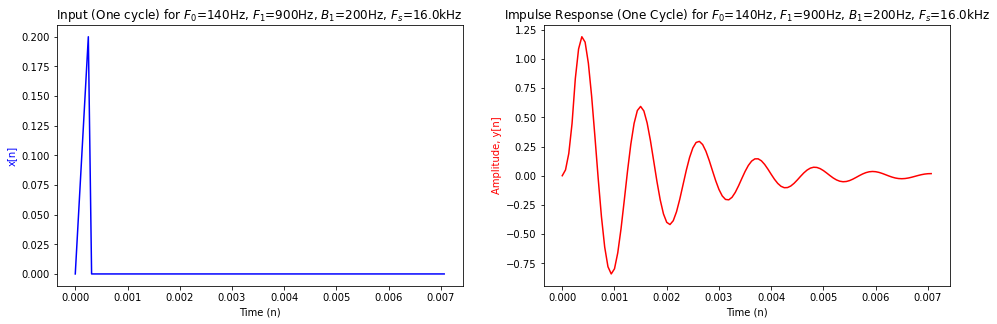

In [7]:
p2_n, p2_x, p2_y = resonator(140, 900, 200, 16000, 0.5, op_name='part2.wav', input='triangular')
plot_waveform(140, 900, 200, 16000, 0.5, p2_n, p2_x, p2_y)

In [8]:
Audio('part2.wav')

Comments on Audio- Constant, Pitch: Low, Quality: Rough.

### Question 3

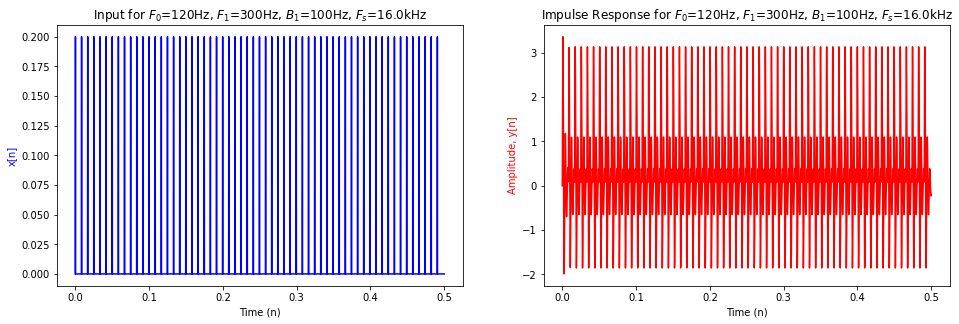

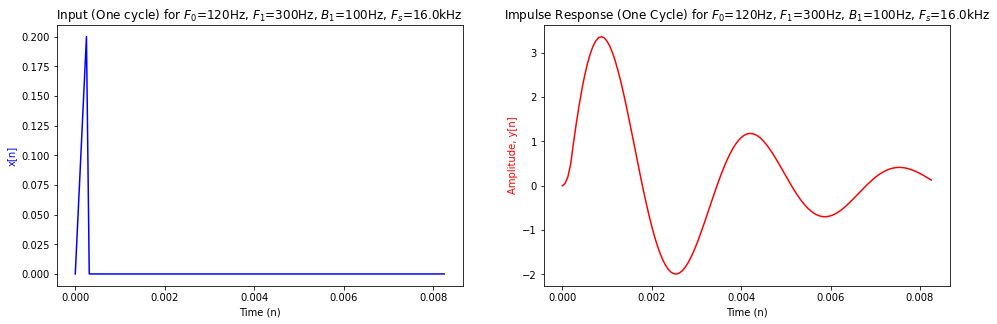

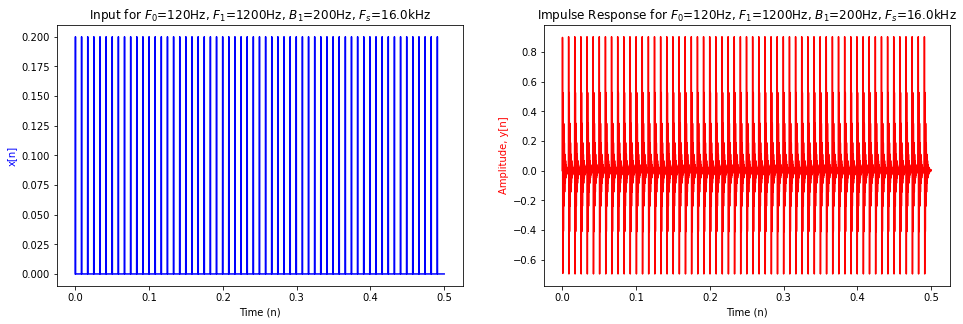

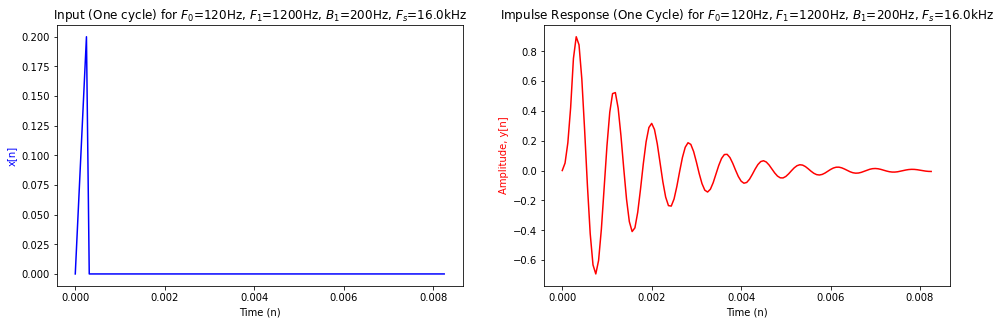

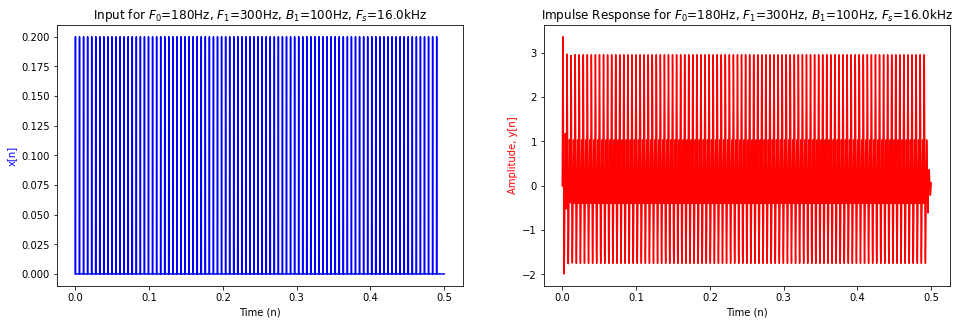

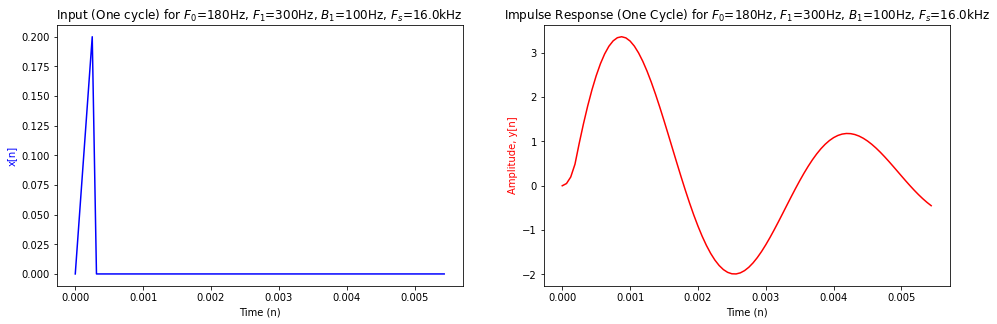

In [9]:
# [f0, f1, b1]
duration = 0.5
a_arr = [120, 300, 100]
b_arr = [120, 1200, 200]
c_arr = [180, 300, 100]

p3a_n, p3a_x, p3a_y =resonator(a_arr[0], a_arr[1], a_arr[2], fs, duration, op_name='part3a.wav', input='triangular')
p3b_n, p3b_x, p3b_y =resonator(b_arr[0], b_arr[1], b_arr[2], fs, duration, op_name='part3b.wav', input='triangular')
p3c_n, p3c_x, p3c_y = resonator(c_arr[0], c_arr[1], c_arr[2], fs, duration, op_name='part3c.wav', input='triangular')
plot_waveform(a_arr[0], a_arr[1], a_arr[2], fs, duration, p3a_n, p3a_x, p3a_y)
plot_waveform(b_arr[0], b_arr[1], b_arr[2], fs, duration, p3b_n, p3b_x, p3b_y)
plot_waveform(c_arr[0], c_arr[1], c_arr[2], fs, duration, p3c_n, p3c_x, p3c_y)

#### Comments on differences in waveform- 
The decay rate of waves in (a) and (c) is much less as compared to (b). This can be attributed to the increased value of Bandwidth in (b).

In [10]:
Audio('part3a.wav')

In [11]:
Audio('part3b.wav')

In [12]:
Audio('part3c.wav')

#### Comments on differences in sound quality-

Audios from (a) and (c) sound similar to each other while (b) sounds completely different than other two audio files. Further, the sound of (a) appears to be slightly low pitched and more rough than that of (c). This roughness can be attributed to low value of $F_0$.

### Question 4

In [13]:
def vowel_resonator(f0, f1, b1, fs, duration, input='impulse', x=None):
    r = np.exp(-b1*pi/fs)
    theta = 2*pi*f1/fs

    b = [1]
    a = [1, -2*r*np.cos(theta), r*r]

    time = np.arange(0, duration, 1/fs)
    y = np.zeros(len(time))
    if x is None:
        x = np.zeros(len(time))
        if input == 'impulse':
            for i in range(int(duration*f0)):
                x[i*int(np.floor(fs/f0))]=1
        elif input == 'triangular':

            values_x = [i/20 for i in range(21)] + []

            for i in range(int(duration*f0)):
                x[i*int(np.floor(fs/f0))]=values_x[0]
                x[i*int(np.floor(fs/f0))+1]=values_x[1]
                x[i*int(np.floor(fs/f0))+2]=values_x[2]
                x[i*int(np.floor(fs/f0))+3]=values_x[3]
                x[i*int(np.floor(fs/f0))+4]=values_x[4]  

    y[0] = x[0]
    y[1] = x[1] - a1*y[0]	
    for i in range(2, len(time)):
        y[i] = x[i] - a[1].real*y[i-1] - a[2].real*y[i-2]
 
    return time, x, y         

In [14]:
# [f0, f1, f2, f3]
vow_a1 = [120, 730, 1090, 2440]
vow_i1 = [120, 270, 2290, 3010]
vow_u1 = [120, 300, 870, 2240]
vow_a2 = [220, 730, 1090, 2440]
vow_i2 = [220, 270, 2290, 3010]
vow_u2 = [220, 300, 870, 2240]
B = 100
duration = 0.5

The function vowel_resonator(f0, f1, b1, fs, duration, input, x) has been cascaded to get the final vowel sounds for different vallues of $F_0$.

In [15]:
na1, xa1, ta1 = vowel_resonator(vow_a1[0], vow_a1[1], B, fs, duration, input='triangular')
_, _, ta2 = vowel_resonator(vow_a1[0], vow_a1[2], B, fs, duration, input='triangular', x=ta1)
_, _, ya1 = vowel_resonator(vow_a1[0], vow_a1[3], B, fs, duration, input='triangular', x=ta2)
ya1 = np.int16(ya1/np.max(np.abs(ya1))*32767)
write('part4a1.wav', fs, ya1)
# plot_waveform(vow_a1[0], vow_a1[1], B, fs, duration, na1, xa1, ya1)

ni1, xi1, ti1 = vowel_resonator(vow_i1[0], vow_i1[1], B, fs, duration, input='triangular')
_, _, ti2 = vowel_resonator(vow_i1[0], vow_i1[2], B, fs, duration, input='triangular', x=ti1)
_, _, yi1 = vowel_resonator(vow_i1[0], vow_i1[3], B, fs, duration, input='triangular', x=ti2)
yi1 = np.int16(yi1/np.max(np.abs(yi1))*32767)
write('part4i1.wav', fs, yi1)
# plot_waveform(vow_i1[0], vow_i1[1], B, fs, duration, ni1, xi1, yi1)


nu1, xu1, tu1 = vowel_resonator(vow_u1[0], vow_u1[1], B, fs, duration, input='triangular')
_, _, tu2 = vowel_resonator(vow_u1[0], vow_u1[2], B, fs, duration, input='triangular', x=tu1)
_, _, yu1 = vowel_resonator(vow_u1[0], vow_u1[3], B, fs, duration, input='triangular', x=tu2)
yu1 = np.int16(yu1/np.max(np.abs(yu1))*32767)
write('part4u1.wav', fs, yu1)
# plot_waveform(vow_u1[0], vow_u1[1], B, fs, duration, nu1, xu1, yu1)

In [16]:
Audio('part4a1.wav') # F0 = 120Hz

In [17]:
Audio('part4i1.wav') # F0 = 120Hz

In [18]:
Audio('part4u1.wav') # F0 = 120Hz

In [19]:
na2, xa2, ta1 = vowel_resonator(vow_a2[0], vow_a2[1], B, fs, duration, input='triangular')
_, _, ta2 = vowel_resonator(vow_a2[0], vow_a2[2], B, fs, duration, input='triangular', x=ta1)
_, _, ya2 = vowel_resonator(vow_a2[0], vow_a2[3], B, fs, duration, input='triangular', x=ta2)
ya2 = np.int16(ya2/np.max(np.abs(ya2))*32767)
write('part4a2.wav', fs, ya2)
# plot_waveform(vow_a2[0], vow_a2[1], B, fs, duration, na2, xa2, ya2)


ni2, xi2, ti1 = vowel_resonator(vow_i2[0], vow_i2[1], B, fs, duration, input='triangular')
_, _, ti2 = vowel_resonator(vow_i2[0], vow_i2[2], B, fs, duration, input='triangular', x=ti1)
_, _, yi2 = vowel_resonator(vow_i2[0], vow_i2[3], B, fs, duration, input='triangular', x=ti2)
yi2 = np.int16(yi2/np.max(np.abs(yi2))*32767)
write('part4i2.wav', fs, yi2)
# plot_waveform(vow_i2[0], vow_i2[1], B, fs, duration, ni2, xi2, yi2)


nu2, xu2, tu1 = vowel_resonator(vow_u2[0], vow_u2[1], B, fs, duration, input='triangular')
_, _, tu2 = vowel_resonator(vow_u2[0], vow_u2[2], B, fs, duration, input='triangular', x=tu1)
_, _, yu2 = vowel_resonator(vow_u2[0], vow_u2[3], B, fs, duration, input='triangular', x=tu2)
yu2 = np.int16(yu2/np.max(np.abs(yu2))*32767)
write('part4u2.wav', fs, yu2)
# plot_waveform(vow_u2[0], vow_u2[1], B, fs, duration, nu2, xu2, yu2)

In [20]:
Audio('part4a2.wav') # F0 = 220Hz

In [21]:
Audio('part4i2.wav') # F0 = 220Hz

In [22]:
Audio('part4u2.wav') # F0 = 220Hz